In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [13]:
data1 = pd.read_csv('passengers2.csv')
data1

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
...,...,...,...,...
139,1960-08-01,606,606.0,NaN
140,1960-09-01,508,508.0,NaN
141,1960-10-01,461,461.0,NaN
142,1960-11-01,390,390.0,NaN


In [15]:
# переведем столбец Month в формат datetime
data1['Month'] = pd.to_datetime(data1['Month'])
# переведём столбец Month в индексы
data1 = data1.set_index('Month')
data1

,reference,target,missing
Month,,,
1949-01-01,112,112.0,NaN
1949-02-01,118,118.0,NaN
1949-03-01,132,132.0,NaN
1949-04-01,129,NaN,129.0
1949-05-01,121,121.0,NaN
...,...,...,...
1960-08-01,606,606.0,NaN
1960-09-01,508,508.0,NaN
1960-10-01,461,461.0,NaN


<AxesSubplot: xlabel='Month'>

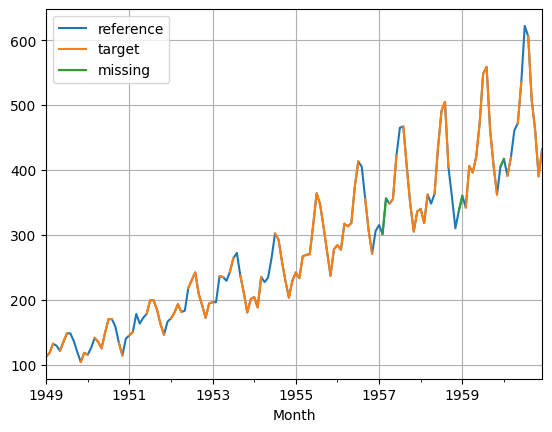

In [17]:
data1.plot(grid = True)

Восполнение данных


Shift(заполнение предыдущими значениями)

In [32]:
data1['target'] = data1['target'].fillna(data1['target'].shift())
data1['target'] = data1['target'].fillna(data1['target'].shift())
data1


,reference,target,missing,Shift
Month,,,,
1949-01-01,112,112.0,NaN,112.0
1949-02-01,118,118.0,NaN,118.0
1949-03-01,132,132.0,NaN,132.0
1949-04-01,129,132.0,129.0,132.0
1949-05-01,121,121.0,NaN,121.0
...,...,...,...,...
1960-08-01,606,606.0,NaN,606.0
1960-09-01,508,508.0,NaN,508.0
1960-10-01,461,461.0,NaN,461.0


Text(0.5, 1.0, 'Заполнение пропусков в данных о пассажирах методом Shift(предыдущих значений)')

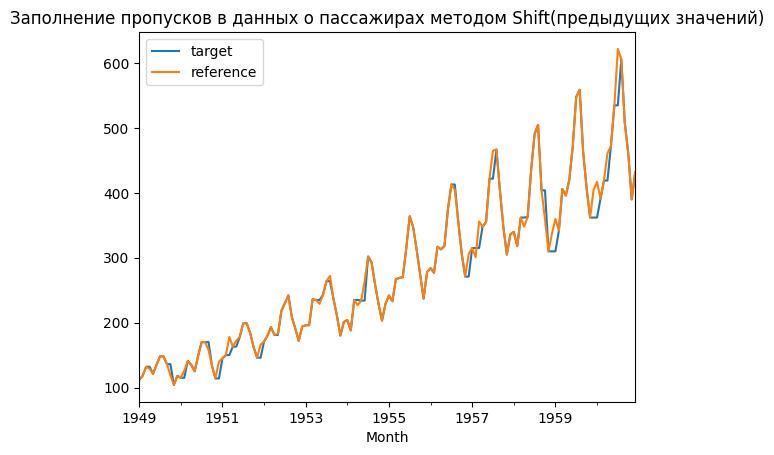

In [58]:
data1[['target', 'reference']].plot()
plt.title('Заполнение пропусков в данных о пассажирах методом Shift(предыдущих значений)')

Восполнение пропусков при помощи скользящего среднего

In [65]:
data2 = pd.read_csv('passengers2.csv')

In [66]:
data2['Month'] = pd.to_datetime(data2['Month'])
data2 = data2.set_index('Month')


In [67]:
data2 = data2.assign(RollingMean=data2.target.fillna(data2.target.rolling(window=3,min_periods=1).mean()))
data2

,reference,target,missing,RollingMean
Month,,,,
1949-01-01,112,112.0,NaN,112.0
1949-02-01,118,118.0,NaN,118.0
1949-03-01,132,132.0,NaN,132.0
1949-04-01,129,NaN,129.0,125.0
1949-05-01,121,121.0,NaN,121.0
...,...,...,...,...
1960-08-01,606,606.0,NaN,606.0
1960-09-01,508,508.0,NaN,508.0
1960-10-01,461,461.0,NaN,461.0


<AxesSubplot: xlabel='Month'>

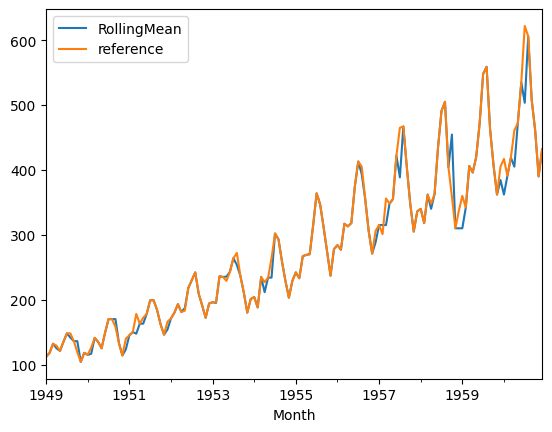

In [68]:
data2[['RollingMean','reference']].plot()

Интерполяция

In [69]:
data3 = pd.read_csv('passengers2.csv')

In [70]:
data3['Month'] = pd.to_datetime(data3['Month'])
data3 = data3.set_index('Month')


In [71]:
data3 = data3.assign(Interpolation = data3.target.interpolate(method='linear'))
data3

,reference,target,missing,Interpolation
Month,,,,
1949-01-01,112,112.0,NaN,112.0
1949-02-01,118,118.0,NaN,118.0
1949-03-01,132,132.0,NaN,132.0
1949-04-01,129,NaN,129.0,126.5
1949-05-01,121,121.0,NaN,121.0
...,...,...,...,...
1960-08-01,606,606.0,NaN,606.0
1960-09-01,508,508.0,NaN,508.0
1960-10-01,461,461.0,NaN,461.0


<AxesSubplot: xlabel='Month'>

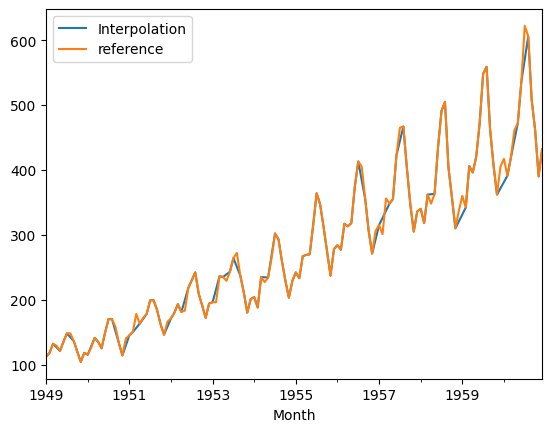

In [72]:
data3[['Interpolation','reference']].plot()

Экспоненциальное сглаживание

In [115]:
data4 = pd.read_csv('passengers2.csv')

In [116]:
data4['Month'] = pd.to_datetime(data4['Month'])
data4 = data4.set_index('Month')


In [117]:
alpha = 0.2

# первое значение совпадает со значением временного ряда
exp = [data4['reference'][0]]

# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(data4['reference'])):
  exp.append(
      alpha * data4['reference'][i] + (1 - alpha) * exp[i - 1])



In [118]:
# добавим кривую сглаживаия в качестве столбца в датафрейм
data4['Exp'] = exp
data4.tail(3)


,reference,target,missing,Exp
Month,,,,
1960-10-01,461,461.0,NaN,501.297019
1960-11-01,390,390.0,NaN,479.037615
1960-12-01,432,432.0,NaN,469.630092


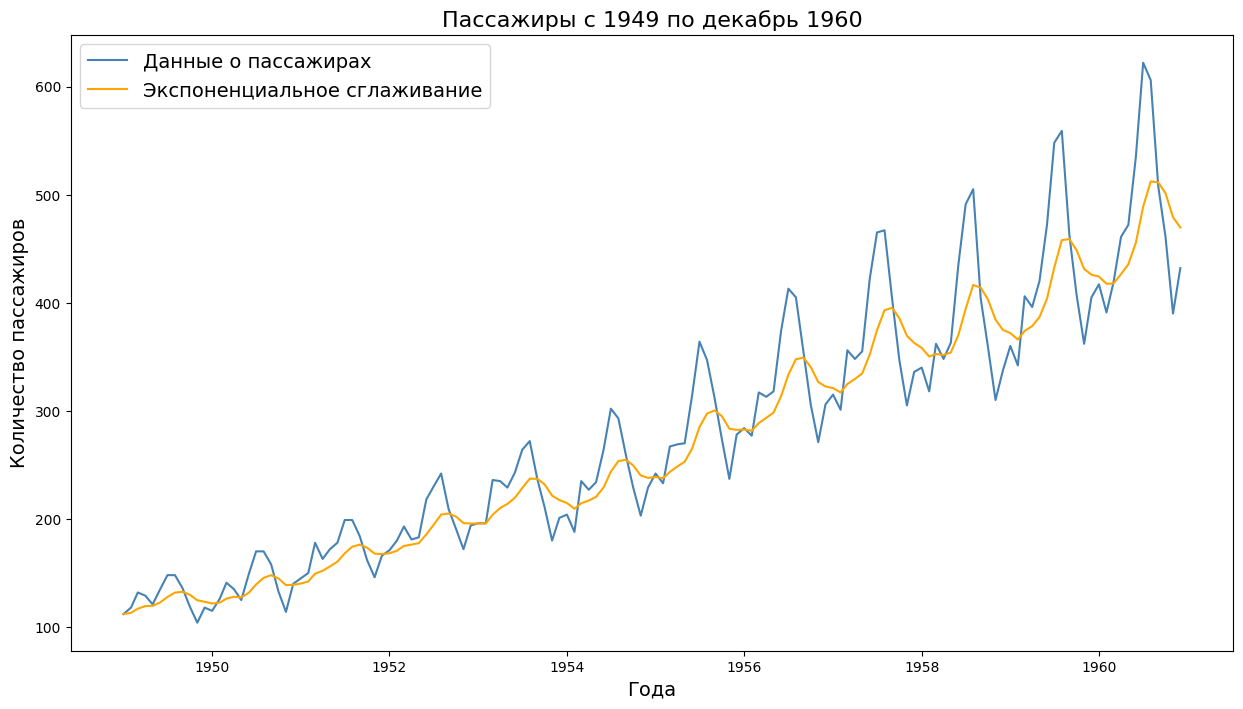

In [119]:

plt.figure(figsize=(15, 8))

# выведем данные о пассажирах и кривую экспоненциального сглаживания
plt.plot(data4['reference'], label='Данные о пассажирах', color='steelblue')
plt.plot(data4['Exp'],
         label='Экспоненциальное сглаживание', color='orange')

plt.legend(title='', loc='upper left', fontsize=14)

plt.ylabel('Количество пассажиров', fontsize=14)
plt.xlabel('Года', fontsize=14)
plt.title('Пассажиры с 1949 по декабрь 1960', fontsize=16)

plt.show()
